In [1]:
import xarray as xr
import numpy as np
from regrid_rain_rate import *
from collections import Counter
import pandas as pd
from utils import LoopTimer
import matplotlib as mpl
from itertools import product 
import datetime as dt
%load_ext autoreload
%autoreload 2

In [3]:
files_to_fix = glob.glob('/home/disk/eos9/jkcm/Data/rain/2015/AMSR2_89GHz_pcp_est_2015_*_day_gridded.nc')
for f in files_to_fix:
    ds = xr.open_dataset(f)
    if not 'date' in ds.dims:
        print(ds.dims)
        print(f)
print('done')

done


In [27]:
files_to_fix = glob.glob('/home/disk/eos9/jkcm/Data/rain/2014/AMSR2_89GHz_pcp_est_2014_*_day_gridded.nc')
lt = LoopTimer(len(files_to_fix))
for f in files_to_fix:
    lt.update()
    date = dt.datetime.strptime(os.path.basename(f)[20:28], '%Y_%j')
    sample = xr.open_dataset(f)
    if 'date' in sample.dims:
        continue
    else:
        print(f)
        sample = sample.expand_dims({'date': [date]})
        save_name = os.path.join(os.path.dirname(f), 'proc', os.path.basename(f))
        comp = dict(zlib=True, complevel=2)
        sample.to_netcdf(save_name, engine='h5netcdf', encoding={var: comp for var in sample.data_vars})


100.00%      ETA 01:48:04      time left: 0 seconds          

In [454]:
test = xr.open_dataset('/home/disk/eos9/jkcm/Data/rain/2015/proc/merged.nc')

In [224]:
test = load_test_data()
# grid = make_gridded_dataset(test, res=0.25)

In [347]:

rain_stats_dict = {0: {'name': 'rain_prob',
                       'long_name': 'Probability of Rain',
                       'standard_name': 'rain_probability',
                       'units': '0-1'},
                   1: {'name': 'rain_rate',
                       'long_name': 'Rain Rate',
                       'standard_name': 'rain_rate',
                       'units': 'mm hr^-1'},
                   2: {'name': 'rain_rwr',
                       'long_name': 'Rain Rate While Raining',
                       'standard_name': 'conditional_rain_rate',
                       'units': 'mm hr^-1'},
                   3: {'name': 'rain_max',
                       'long_name': 'Max Rain Rate',
                       'standard_name': 'max_rain_rate',
                       'units': 'mm hr^-1'}}

func_dict = {'mean': np.nanmean,
             'median': np.nanmedian,
             '25_pctile': lambda x: np.nanpercentile(x, 25),
             '75_pctile': lambda x: np.nanpercentile(x, 75),
             'min': np.nanmin,
             'max': np.nanmax}

In [348]:
for k, v in rain_stats_dict.items():
    print('working on '+v['name'])
#     sys.stdout.flush()
#     old_data = data.rain_stats.isel(prob_rate_rwr_max=k).values.flatten()[good_filt]
    for func_name, func in func_dict.items():
#         new_vals = new_reshape(grouped.apply(func, old_data))
#         new_dict = {'long_name': f"{v['long_name']}_{func_name}",
#                     'standard_name': f"{v['standard_name']}_{func_name}",
#                     'units': v['units']},
#         ds[f"{v['name']}_{func_name}"] = (('latitude', 'longitude'), new_vals, new_dict)
        print(f"{v['name']}_{func_name}")

working on rain_prob
rain_prob_mean
rain_prob_median
rain_prob_25_pctile
rain_prob_75_pctile
rain_prob_min
rain_prob_max
working on rain_rate
rain_rate_mean
rain_rate_median
rain_rate_25_pctile
rain_rate_75_pctile
rain_rate_min
rain_rate_max
working on rain_rwr
rain_rwr_mean
rain_rwr_median
rain_rwr_25_pctile
rain_rwr_75_pctile
rain_rwr_min
rain_rwr_max
working on rain_max
rain_max_mean
rain_max_median
rain_max_25_pctile
rain_max_75_pctile
rain_max_min
rain_max_max


In [341]:
d = test['datetime'].isel(time=1)

In [345]:
np.nanmean(d.astype('int64')).astype('datetime64[ns]')

numpy.datetime64('2014-07-25T00:00:00.000000000')

In [349]:
    files_2014 = glob.glob('/home/disk/eos4/rmeast/rain_rates_89/2014/AMSR2_89GHz_pcp_est_2014_*_day.nc')
    files_2015 = glob.glob('/home/disk/eos5/rmeast/rain_rates_89/2015/AMSR2_89GHz_pcp_est_2015_*_day.nc')

In [364]:
done_2014 = [os.path.basename(i)[:-11] for i in glob.glob('/home/disk/eos9/jkcm/Data/rain/2014/AMSR2_89*.nc')]
not_done_2014 = [i for i in files_2014 if os.path.basename(i)[:-3] not in done_2014]

In [368]:
len(not_done_2014)

205

In [369]:
    ds['time'] = (('latitude', 'longitude'), new_reshape(grouped.apply(np.nanmean, data['datetime'].values.flatten()[good_filt])))

NameError: name 'new_reshape' is not defined

In [226]:
# old_lats, old_lons, old_data = test.latitude.values, test.longitude.values, test.rain_stats.isel(prob_rate_rwr_max=1).values
# good_filt = ~np.logical_or(np.isnan(old_lats), np.isnan(old_lons))
# old_lats, old_lons, old_data = old_lats[good_filt], old_lons[good_filt], old_data[good_filt]
# res = 0.25
# if not 1/res == int(1/res):
#     raise ValueError('pick a nice one, plz')

In [227]:
# grid_lats = np.arange(-90, 90, res)
# grid_lons = np.arange(0, 360, res)

# grid_coords = np.array(list(product(grid_lats, grid_lons)))
# full_grid_lats = grid_coords[:,0]
# full_grid_lons = grid_coords[:,1]
# grid_coords_lats_idx = (full_grid_lats+90)/res
# grid_coords_lons_idx = full_grid_lons/res
# grid_combined_idx = (360/res)*grid_coords_lats_idx + grid_coords_lons_idx
# assert(len(np.unique(grid_combined_idx)) == len(grid_combined_idx))

In [228]:
# def round_nearest(arr, res):
#     nans = np.isnan(arr)
#     ret = (((arr+res/2)/res)//1)*res
#     ret[nans] = np.nan
#     return ret
# lats_regrid = round_nearest(old_lats, res)
# lons_regrid = round_nearest(old_lons, res)%360
# lats_regrid_idx = (lats_regrid+90)/res
# lons_regrid_idx = lons_regrid/res
# unique_combined_idx = (360/res)*lats_regrid_idx + lons_regrid_idx
# assert(set(unique_combined_idx).issubset(grid_combined_idx))

In [395]:
sample = xr.open_mfdataset('/home/disk/eos9/jkcm/Data/rain/2015/AMSR2_89GHz_pcp_est_2015_*_day_gridded.nc', concat_dim='day')

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfda

In [ ]:
sample.

In [427]:
sample

<xarray.Dataset>
Dimensions:              (day: 300, latitude: 720, longitude: 1440)
Coordinates:
  * latitude             (latitude) float64 -90.0 -89.75 -89.5 ... 89.5 89.75
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
Dimensions without coordinates: day
Data variables:
    not_nan_count        (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    obs_count            (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    rain_max_25_pctile   (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    rain_max_75_pctile   (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    rain_max_max         (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    rain_max_mean        (day, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    rain

In [419]:
mean_rain_rate = sample.rain_rate_mean.where(sample.rain_rate_mean>0).mean(axis=0).compute()
mean_rain_prob = sample.rain_prob_mean.where(sample.rain_prob_mean>0).mean(axis=0).compute()

In [423]:
mean_max_rain_prob = sample.rain_prob_max.where(sample.rain_prob_max>0).mean(axis=0).compute()

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


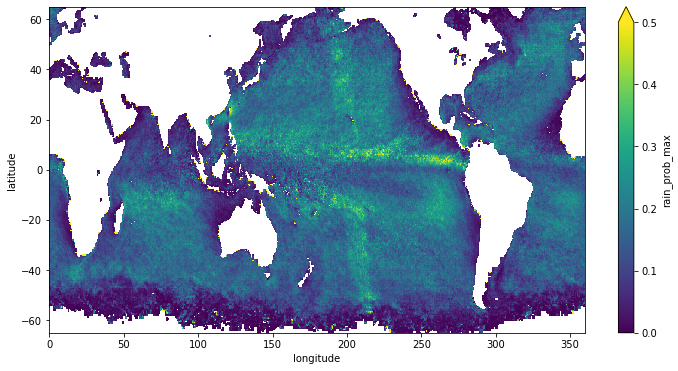

In [426]:
mean_max_rain_prob.plot(vmin=0, vmax=0.5)
plt.ylim((-65, 65))
plt.gcf().set_size_inches(12, 6)

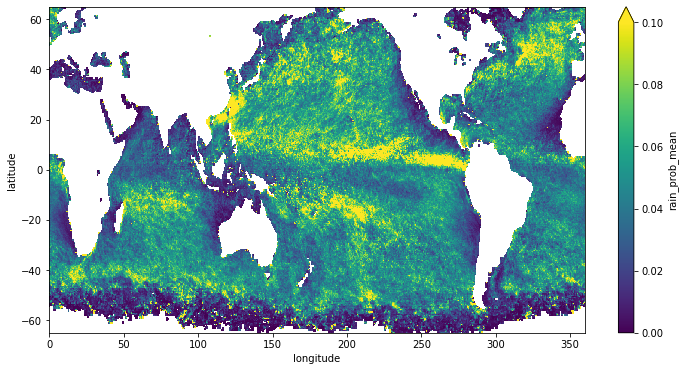

In [421]:
mean_rain_prob.plot(vmin=0, vmax=0.1)
plt.ylim((-65, 65))
plt.gcf().set_size_inches(12, 6)

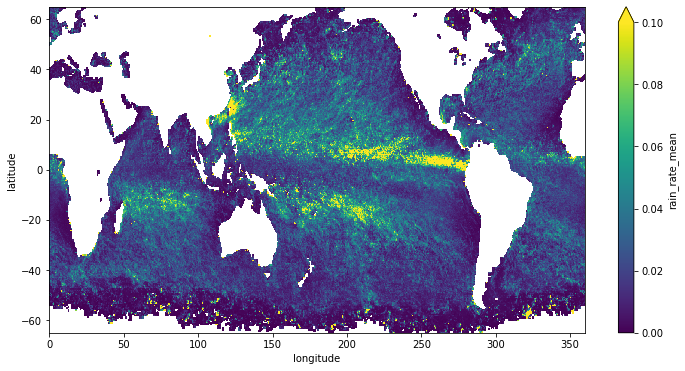

In [422]:
mean_rain_rate.plot(vmin=0, vmax=0.1)
plt.ylim((-65, 65))
plt.gcf().set_size_inches(12, 6)

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


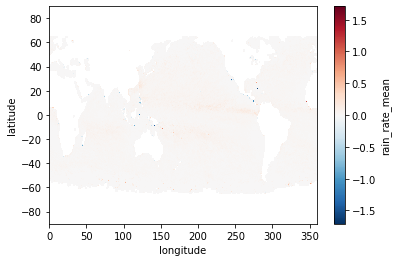

In [398]:
sample.rain_rate_mean.mean(axis=0)

AttributeError: 'Rectangle' object has no property 'vmin'

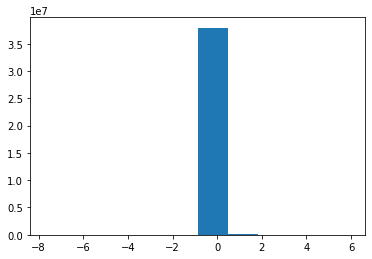

In [416]:
sample.rain_rate_median.plot(vmin=0, vmax=0.5)
plt.xlim((200, 250))
plt.ylim((-40, 40))

In [271]:
grouped = Groupby(unique_combined_idx.astype(int))

new_combined_idx = grouped.keys
reduced_lons_idx = new_combined_idx%(360/res)
reduced_lats_idx = new_combined_idx//(360/res)
reduced_lons = reduced_lons_idx*res
reduced_lats = (reduced_lons_idx*res)-90

In [322]:
group_means = grouped.apply(np.nanmean, old_data, broadcast=False)
gridded_means = reshape_incomplete_array(grid_combined_idx, grouped.keys, group_means, shape=(len(grid_lats), len(grid_lons)))

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


In [332]:
plt.figure(figsize=(5,10))
plt.pcolormesh(grid_lons, grid_lats, gridded_means, vmin=0, vmax=0.05, norm=mpl.colors.LogNorm())
plt.xlim(200,300)

(200, 300)

ValueError: values must all be positive

<Figure size 360x720 with 1 Axes>

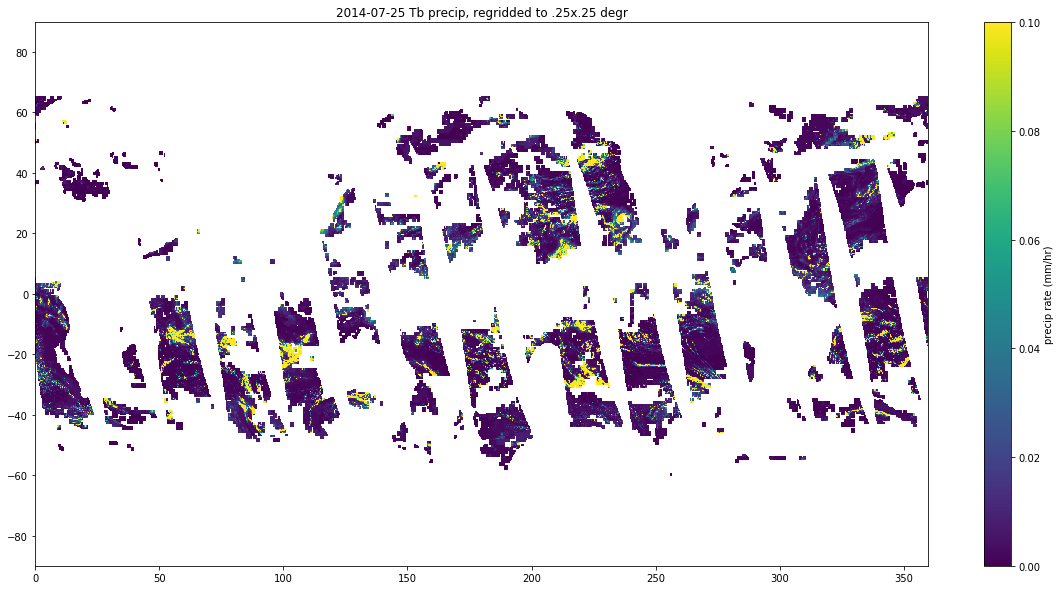

In [296]:
fig, ax = plt.subplots(figsize=(20,10))
pc = ax.pcolormesh(grid_lons, grid_lats, gridded30_means, vmin=0, vmax=0.01)
plt.colorbar(pc, ax=ax, label='precip rate (mm/hr)')
ax.set_title('2014-07-25 Tb precip, regridded to .25x.25 degr')
plt.savefig('/home/disk/p/jkcm/plots/regrid_precip.png', dpi=300, bbox_inches='tight')

In [297]:
c = Counter(unique_combined_idx)

Text(0, 0.5, '# of boxes')

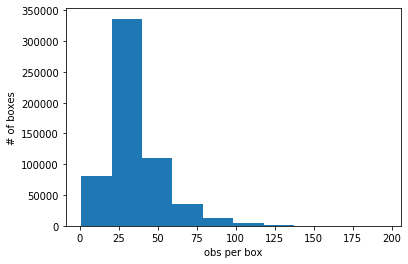

In [314]:
plt.hist(list(c.values()))
plt.xlabel('obs per box')
plt.ylabel('# of boxes')

In [43]:
bins = np.full((len(new_lats), len(new_lons)), fill_value=0)

In [54]:
lons_rg

array([227.25, 227.25, 227.  , ..., 180.75, 181.  , 180.75], dtype=float32)

In [55]:
lons_c

array([909., 909., 908., ..., 723., 724., 723.], dtype=float32)

In [44]:
for (lat, lon) in zip(lats_rg, lons_rg):
    

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
df = pd.DataFrame(data=[lats_rg, lons_rg, old_data])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-55b79e654fd8>", line 1, in <module>
    df = pd.DataFrame(data=[lats_rg, lons_rg, old_data])
  File "/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/pandas/core/frame.py", line 486, in __init__
    mgr = arrays_to_mgr(arrays, columns, index, columns, dtype=dtype)
  File "/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/pandas/core/internals/construction.py", line 69, in arrays_to_mgr
    arrays = _homogenize(arrays, index, dtype)
  File "/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/pandas/core/internals/construction.py", line 323, in _homogenize
    val, index, dtype=dtype, copy=False, raise_cast_failure=False
  File "/home/disk/p/jkcm/anaconda3

KeyboardInterrupt: 

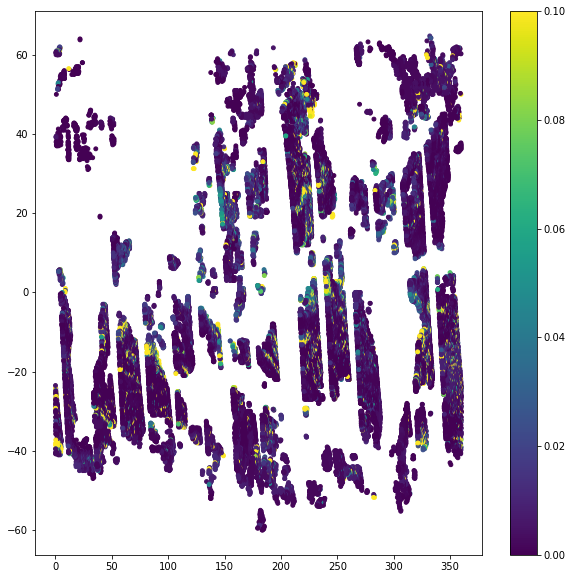

In [23]:
n=100
plt.figure(figsize=(10,10))
sc = plt.scatter(y=lats_rg[::n], x=lons_rg[::n], c=old_data[::n], s=15, vmin=0, vmax=0.1)
plt.colorbar(sc)

In [16]:
plt.figure(figsize=(10,10))
sc = plt.scatter(y=lats_rg_c, x=lons_rg_c, c=old_data, s=15, vmin=0, vmax=0.1)
plt.colorbar(sc)

NameError: name 'old_rate_c' is not defined

<Figure size 720x720 with 0 Axes>

(160, 165)

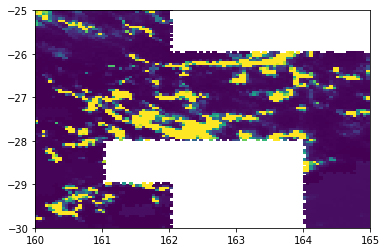

In [252]:
plt.pcolormesh(*grid, result3, vmin=0, vmax=0.1)
plt.ylim((-30, -25))
plt.xlim((160, 165))

In [374]:
grid[0].shape

(2601, 7200)

In [378]:
x = regrid_data(lats_rg_c, lons_rg_c, old_rate_c, lats, lons, max_distance=0.25, n=1)

(521, 1440)
(521, 1440)


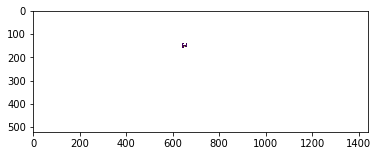

In [381]:
plt.imshow(x)

In [ ]:
data  s

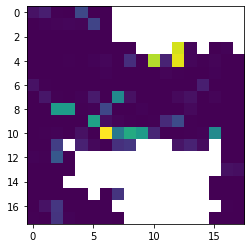

In [382]:
plt.imshow(x[np.where(lats<-25)[0][-1]:np.where(lats>-30)[0][0]:-1,
                   np.where(lons>160)[0][0]:np.where(lons<165)[0][-1]])

In [ ]:
test = load_test_data()
